In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

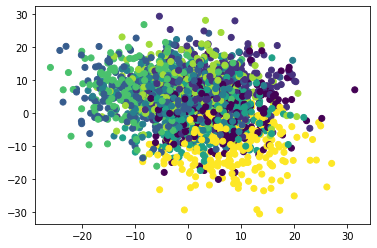

In [2]:
X, y = make_blobs(n_samples=2000, n_features=10, centers=8, cluster_std=7)
plt.scatter(X.T[0], X.T[1], c=y)

In [3]:
from tensorflow.keras.utils import to_categorical 

y_cat = to_categorical(y)

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [5]:
def initialize_model():
    # Model architecture
    model = models.Sequential()
    model.add(layers.Dense(25, activation='relu', input_dim=10))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    
    # Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [8]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [12]:
SScaler = StandardScaler()
SScaler.fit(X)

StandardScaler()

In [13]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):
    # Split the data into train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]

    X_train = SScaler.transform(X_train)
    X_test = SScaler.transform(X_test)
    
    # Initialize the model
    model = initialize_model()
    
    # Fit the model on the train data
    model.fit(X_train, y_train,
              epochs=150,
              batch_size=16, 
              verbose=1)
    
    # Evaluate the model on the test data
    res = model.evaluate(X_test, y_test, verbose=0)
    results.append(res)

In [24]:
results[0][1]

0.8349999785423279

In [25]:
for i in range(len(results)):
    print(results[i][1])

0.8349999785423279
0.8450000286102295
0.8399999737739563
0.8100000023841858
0.8399999737739563
0.8349999785423279
0.8399999737739563
0.8299999833106995
0.8500000238418579
0.800000011920929


In [14]:
accuracy = [_[1] for _ in results]

print(f'Mean accuracy : {np.mean(accuracy)*100:.2f}% (±{np.std(accuracy)*100:.2f})')

Mean accuracy : 83.25% (±1.49)


In [26]:
len_ = int(0.7*len(X))
X_train = X[:len_]
X_test = X[len_:]

y_train = y_cat[:len_]
y_test = y_cat[len_:]

In [28]:
model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=500,
                      batch_size=16, 
                      verbose=1)

Epoch 1/500
88/88 [==============================] - 2s 7ms/step - loss: 3.9514 - accuracy: 0.1077 - val_loss: 2.0208 - val_accuracy: 0.2867
Epoch 2/500
88/88 [==============================] - 0s 3ms/step - loss: 1.9001 - accuracy: 0.3110 - val_loss: 1.5715 - val_accuracy: 0.4633
Epoch 3/500
88/88 [==============================] - 0s 3ms/step - loss: 1.4739 - accuracy: 0.4935 - val_loss: 1.3264 - val_accuracy: 0.5533
Epoch 4/500
88/88 [==============================] - 0s 3ms/step - loss: 1.2351 - accuracy: 0.6142 - val_loss: 1.0931 - val_accuracy: 0.6233
Epoch 5/500
88/88 [==============================] - 0s 3ms/step - loss: 0.9914 - accuracy: 0.6940 - val_loss: 0.9239 - val_accuracy: 0.6683
Epoch 6/500
88/88 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.7272 - val_loss: 0.7908 - val_accuracy: 0.7150
Epoch 7/500
88/88 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.7662 - val_loss: 0.7076 - val_accuracy: 0.7650
Epoch 8/500
8

Epoch 59/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.8997 - val_loss: 0.6997 - val_accuracy: 0.8133
Epoch 60/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9139 - val_loss: 0.6912 - val_accuracy: 0.8100
Epoch 61/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.9010 - val_loss: 0.7129 - val_accuracy: 0.8067
Epoch 62/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.9055 - val_loss: 0.7047 - val_accuracy: 0.8083
Epoch 63/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.9055 - val_loss: 0.7001 - val_accuracy: 0.8117
Epoch 64/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2750 - accuracy: 0.9077 - val_loss: 0.7094 - val_accuracy: 0.7967
Epoch 65/500
88/88 [==============================] - 0s 3ms/step - loss: 0.2683 - accuracy: 0.9004 - val_loss: 0.7084 - val_accuracy: 0.8050
Epoch 

88/88 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9294 - val_loss: 0.9012 - val_accuracy: 0.7883
Epoch 117/500
88/88 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9429 - val_loss: 0.9423 - val_accuracy: 0.7867
Epoch 118/500
88/88 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.9311 - val_loss: 0.9438 - val_accuracy: 0.7917
Epoch 119/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9219 - val_loss: 0.9383 - val_accuracy: 0.7850
Epoch 120/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.9405 - val_loss: 0.9555 - val_accuracy: 0.7883
Epoch 121/500
88/88 [==============================] - 0s 4ms/step - loss: 0.2069 - accuracy: 0.9205 - val_loss: 0.9355 - val_accuracy: 0.7900
Epoch 122/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1557 - accuracy: 0.9445 - val_loss: 0.9537 - val_accuracy: 0.7850
Epoch 123/500

88/88 [==============================] - 0s 4ms/step - loss: 0.1399 - accuracy: 0.9520 - val_loss: 1.2219 - val_accuracy: 0.7783
Epoch 174/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1197 - accuracy: 0.9608 - val_loss: 1.2444 - val_accuracy: 0.7900
Epoch 175/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 0.9531 - val_loss: 1.2756 - val_accuracy: 0.7783
Epoch 176/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1325 - accuracy: 0.9489 - val_loss: 1.2597 - val_accuracy: 0.7733
Epoch 177/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1542 - accuracy: 0.9387 - val_loss: 1.2398 - val_accuracy: 0.7767
Epoch 178/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.9597 - val_loss: 1.2769 - val_accuracy: 0.7683
Epoch 179/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 0.9462 - val_loss: 1.2595 - val_accuracy: 0.7800
Epoch 180/500

88/88 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9715 - val_loss: 1.6015 - val_accuracy: 0.7650
Epoch 231/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9723 - val_loss: 1.5979 - val_accuracy: 0.7717
Epoch 232/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9702 - val_loss: 1.6270 - val_accuracy: 0.7750
Epoch 233/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1002 - accuracy: 0.9686 - val_loss: 1.6277 - val_accuracy: 0.7617
Epoch 234/500
88/88 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9605 - val_loss: 1.6352 - val_accuracy: 0.7700
Epoch 235/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 0.9603 - val_loss: 1.5972 - val_accuracy: 0.7633
Epoch 236/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 0.9730 - val_loss: 1.6222 - val_accuracy: 0.7667
Epoch 237/500

88/88 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9672 - val_loss: 2.0074 - val_accuracy: 0.7550
Epoch 288/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0843 - accuracy: 0.9683 - val_loss: 1.9997 - val_accuracy: 0.7533
Epoch 289/500
88/88 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9655 - val_loss: 2.0037 - val_accuracy: 0.7517
Epoch 290/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9725 - val_loss: 2.0552 - val_accuracy: 0.7500
Epoch 291/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.9721 - val_loss: 2.0497 - val_accuracy: 0.7567
Epoch 292/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9766 - val_loss: 2.0296 - val_accuracy: 0.7550
Epoch 293/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9788 - val_loss: 2.0366 - val_accuracy: 0.7533
Epoch 294/500

88/88 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9861 - val_loss: 2.4344 - val_accuracy: 0.7550
Epoch 345/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9834 - val_loss: 2.4457 - val_accuracy: 0.7550
Epoch 346/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9884 - val_loss: 2.4057 - val_accuracy: 0.7533
Epoch 347/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9846 - val_loss: 2.4636 - val_accuracy: 0.7500
Epoch 348/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9827 - val_loss: 2.5083 - val_accuracy: 0.7617
Epoch 349/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9777 - val_loss: 2.4982 - val_accuracy: 0.7483
Epoch 350/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 2.4825 - val_accuracy: 0.7483
Epoch 351/500

88/88 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9954 - val_loss: 2.8555 - val_accuracy: 0.7467
Epoch 402/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0585 - accuracy: 0.9833 - val_loss: 2.8555 - val_accuracy: 0.7417
Epoch 403/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0493 - accuracy: 0.9863 - val_loss: 2.8708 - val_accuracy: 0.7483
Epoch 404/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9880 - val_loss: 2.8690 - val_accuracy: 0.7500
Epoch 405/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9958 - val_loss: 2.8852 - val_accuracy: 0.7433
Epoch 406/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9936 - val_loss: 2.9664 - val_accuracy: 0.7433
Epoch 407/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9832 - val_loss: 2.9178 - val_accuracy: 0.7517
Epoch 408/500

88/88 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9984 - val_loss: 3.3160 - val_accuracy: 0.7467
Epoch 459/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9947 - val_loss: 3.3503 - val_accuracy: 0.7467
Epoch 460/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9973 - val_loss: 3.3355 - val_accuracy: 0.7517
Epoch 461/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9968 - val_loss: 3.3177 - val_accuracy: 0.7500
Epoch 462/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9970 - val_loss: 3.3790 - val_accuracy: 0.7483
Epoch 463/500
88/88 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9973 - val_loss: 3.3717 - val_accuracy: 0.7500
Epoch 464/500
88/88 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9951 - val_loss: 3.3506 - val_accuracy: 0.7500
Epoch 465/500

In [29]:
results = model.evaluate(X_test, y_test, verbose=1)
print(f'The accuracy on the test set is of {results[1]:.2f}')

19/19 [==============================] - 0s 2ms/step - loss: 3.5544 - accuracy: 0.7517
The accuracy on the test set is of 0.75


In [30]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    if title:
        fig.suptitle(title)

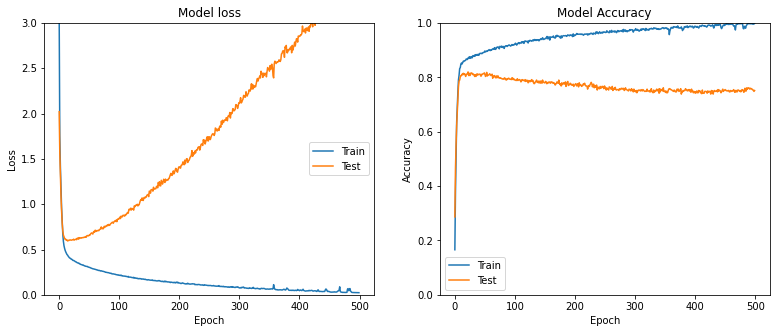

In [31]:
plot_loss_accuracy(history)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/500
62/62 [==============================] - 1s 8ms/step - loss: 5.4155 - accuracy: 0.0926 - val_loss: 2.8623 - val_accuracy: 0.1686
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 2.3546 - accuracy: 0.2668 - val_loss: 1.8208 - val_accuracy: 0.3492
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 1.6295 - accuracy: 0.4374 - val_loss: 1.4741 - val_accuracy: 0.4822
Epoch 4/500
62/62 [==============================] - 0s 4ms/step - loss: 1.3515 - accuracy: 0.5124 - val_loss: 1.2797 - val_accuracy: 0.5677
Epoch 5/500
62/62 [==============================] - 0s 4ms/step - loss: 1.1788 - accuracy: 0.6015 - val_loss: 1.1286 - val_accuracy: 0.6295
Epoch 6/500
62/62 [==============================] - 0s 4ms/step - loss: 1.0543 - accuracy: 0.6550 - val_loss: 0.9979 - val_accuracy: 0.6508
Epoch 7/500
62/62 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.7133 - val_loss: 0.8811 - val_accuracy: 0.6912
Epoch 8/500
6

The accuracy on the test set is of 0.77


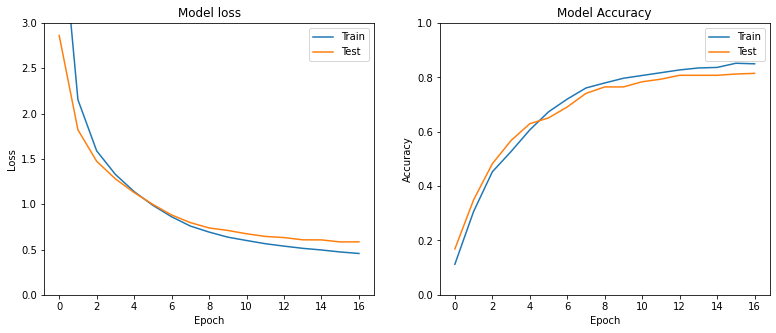

In [34]:
plot_loss_accuracy(history)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

Epoch 1/500
62/62 [==============================] - 1s 8ms/step - loss: 5.0203 - accuracy: 0.0694 - val_loss: 2.9591 - val_accuracy: 0.1330
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 2.4760 - accuracy: 0.2053 - val_loss: 2.0828 - val_accuracy: 0.2660
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 1.8504 - accuracy: 0.3452 - val_loss: 1.7234 - val_accuracy: 0.4109
Epoch 4/500
62/62 [==============================] - 0s 4ms/step - loss: 1.5491 - accuracy: 0.4488 - val_loss: 1.4686 - val_accuracy: 0.4869
Epoch 5/500
62/62 [==============================] - 0s 4ms/step - loss: 1.3245 - accuracy: 0.5353 - val_loss: 1.2769 - val_accuracy: 0.5629
Epoch 6/500
62/62 [==============================] - 0s 4ms/step - loss: 1.1181 - accuracy: 0.6049 - val_loss: 1.1148 - val_accuracy: 0.6200
Epoch 7/500
62/62 [==============================] - 0s 4ms/step - loss: 0.9718 - accuracy: 0.6736 - val_loss: 0.9939 - val_accuracy: 0.6698
Epoch 8/500
6

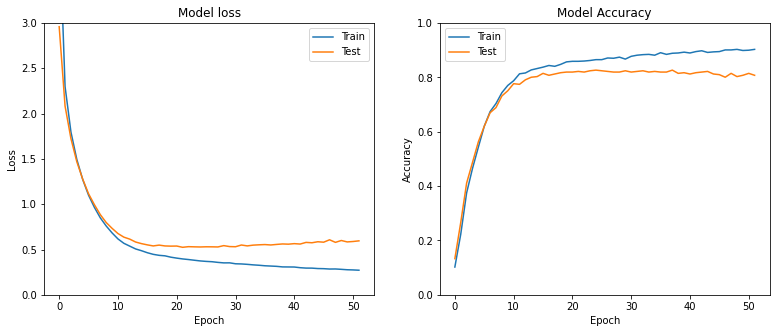

In [37]:
es = EarlyStopping(patience=30)

model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=1, 
                    callbacks=[es])

plot_loss_accuracy(history)


results = model.evaluate(X_test, y_test, verbose=1)
print(f'The accuracy on the test set is of {results[1]:.2f}')

Epoch 1/500
62/62 [==============================] - 1s 8ms/step - loss: 4.0228 - accuracy: 0.0948 - val_loss: 2.7775 - val_accuracy: 0.1330
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 2.3946 - accuracy: 0.2256 - val_loss: 2.0826 - val_accuracy: 0.2589
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 1.8548 - accuracy: 0.3213 - val_loss: 1.7580 - val_accuracy: 0.3729
Epoch 4/500
62/62 [==============================] - 0s 4ms/step - loss: 1.5788 - accuracy: 0.4304 - val_loss: 1.5188 - val_accuracy: 0.4679
Epoch 5/500
62/62 [==============================] - 0s 4ms/step - loss: 1.2768 - accuracy: 0.5475 - val_loss: 1.3076 - val_accuracy: 0.5606
Epoch 6/500
62/62 [==============================] - 0s 4ms/step - loss: 1.1441 - accuracy: 0.5919 - val_loss: 1.1628 - val_accuracy: 0.6366
Epoch 7/500
62/62 [==============================] - 0s 4ms/step - loss: 0.8972 - accuracy: 0.7088 - val_loss: 1.0483 - val_accuracy: 0.6651
Epoch 8/500
6

Epoch 59/500
62/62 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.9124 - val_loss: 0.7788 - val_accuracy: 0.7862
The accuracy on the test set is of 0.77


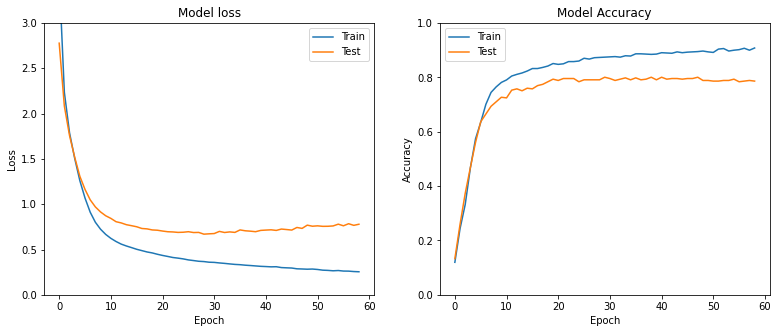

In [39]:
es = EarlyStopping(patience=30, restore_best_weights=True)

model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=1, 
                    callbacks=[es])

plot_loss_accuracy(history)


results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

Epoch 1/500
979/979 [==============================] - 3s 3ms/step - loss: 2.5151 - accuracy: 0.3287 - val_loss: 1.0051 - val_accuracy: 0.6698
Epoch 2/500
979/979 [==============================] - 2s 2ms/step - loss: 0.8477 - accuracy: 0.7076 - val_loss: 0.7458 - val_accuracy: 0.7696
Epoch 3/500
979/979 [==============================] - 2s 2ms/step - loss: 0.6062 - accuracy: 0.7748 - val_loss: 0.6775 - val_accuracy: 0.7791
Epoch 4/500
979/979 [==============================] - 2s 3ms/step - loss: 0.5121 - accuracy: 0.8181 - val_loss: 0.6312 - val_accuracy: 0.8052
Epoch 5/500
979/979 [==============================] - 3s 3ms/step - loss: 0.4573 - accuracy: 0.8326 - val_loss: 0.6059 - val_accuracy: 0.7957
Epoch 6/500
979/979 [==============================] - 2s 3ms/step - loss: 0.4033 - accuracy: 0.8661 - val_loss: 0.5812 - val_accuracy: 0.8147
Epoch 7/500
979/979 [==============================] - 2s 2ms/step - loss: 0.3811 - accuracy: 0.8698 - val_loss: 0.5579 - val_accuracy: 0.8147

245/245 [==============================] - 1s 3ms/step - loss: 0.2226 - accuracy: 0.9154 - val_loss: 0.6457 - val_accuracy: 0.8100
Epoch 32/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9301 - val_loss: 0.6776 - val_accuracy: 0.8171
Epoch 33/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2053 - accuracy: 0.9297 - val_loss: 0.6513 - val_accuracy: 0.8076
Epoch 34/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2049 - accuracy: 0.9300 - val_loss: 0.6401 - val_accuracy: 0.8314
Epoch 35/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.9089 - val_loss: 0.6880 - val_accuracy: 0.8147
Epoch 36/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.9262 - val_loss: 0.6631 - val_accuracy: 0.8290
Epoch 37/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2059 - accuracy: 0.9261 - val_loss: 0.7012 - val_accuracy: 0.8147
Epoch

Epoch 51/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3569 - accuracy: 0.8667 - val_loss: 0.6367 - val_accuracy: 0.7838
Epoch 52/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.8786 - val_loss: 0.6280 - val_accuracy: 0.7910
Epoch 53/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.8835 - val_loss: 0.6299 - val_accuracy: 0.7862
Epoch 54/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.8830 - val_loss: 0.6297 - val_accuracy: 0.7981
Epoch 55/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.8863 - val_loss: 0.6281 - val_accuracy: 0.7981
Epoch 56/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3426 - accuracy: 0.8898 - val_loss: 0.6297 - val_accuracy: 0.7910
Epoch 57/500
31/31 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.8929 - val_loss: 0.6350 - val_accuracy: 0.7957
Epoch 

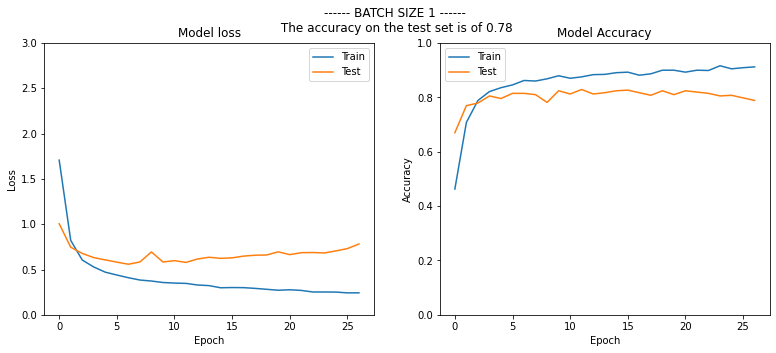

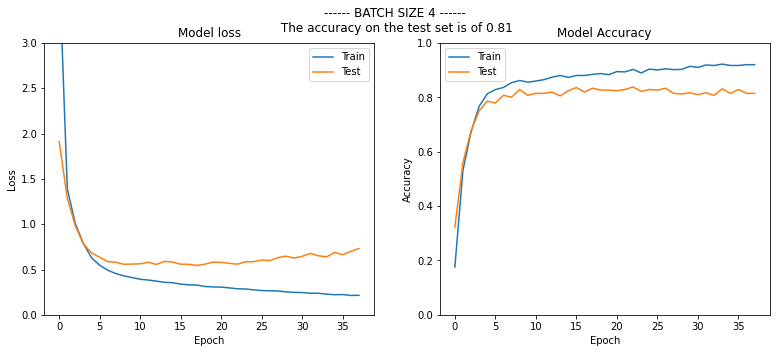

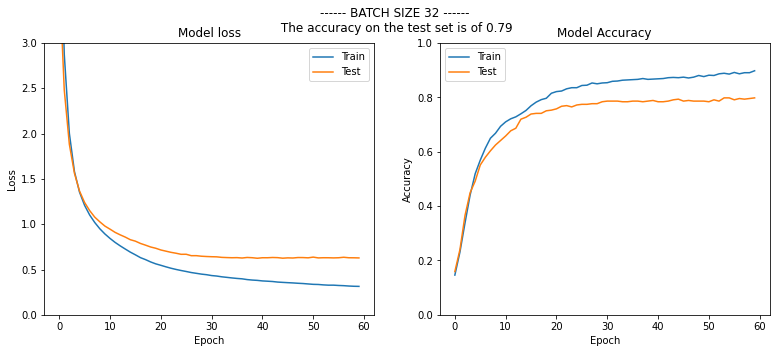

In [40]:
# RUN THIS CELL (it can take some time)

es = EarlyStopping(patience=20, restore_best_weights=True)

for batch_size in [1, 4, 32]:
    
    model = initialize_model()

    history = model.fit(X_train, y_train,
                        validation_split=0.3,
                        epochs=500,
                        batch_size=batch_size, 
                        verbose=1, 
                        callbacks=[es])

    results = model.evaluate(X_test, y_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

Epoch 1/300
31/31 [==============================] - 1s 13ms/step - loss: 6.5902 - accuracy: 0.1423 - val_loss: 4.0270 - val_accuracy: 0.1259
Epoch 2/300
31/31 [==============================] - 0s 4ms/step - loss: 3.2312 - accuracy: 0.1767 - val_loss: 2.5230 - val_accuracy: 0.2114
Epoch 3/300
31/31 [==============================] - 0s 4ms/step - loss: 2.1379 - accuracy: 0.2955 - val_loss: 1.9762 - val_accuracy: 0.3254
Epoch 4/300
31/31 [==============================] - 0s 4ms/step - loss: 1.7742 - accuracy: 0.3774 - val_loss: 1.7228 - val_accuracy: 0.4228
Epoch 5/300
31/31 [==============================] - 0s 4ms/step - loss: 1.4961 - accuracy: 0.4701 - val_loss: 1.5837 - val_accuracy: 0.4727
Epoch 6/300
31/31 [==============================] - 0s 4ms/step - loss: 1.3510 - accuracy: 0.5375 - val_loss: 1.4780 - val_accuracy: 0.5012
Epoch 7/300
31/31 [==============================] - 0s 4ms/step - loss: 1.2882 - accuracy: 0.5538 - val_loss: 1.3976 - val_accuracy: 0.5202
Epoch 8/300


Epoch 59/300
31/31 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.9177 - val_loss: 0.6708 - val_accuracy: 0.8314
Epoch 60/300
31/31 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9246 - val_loss: 0.6682 - val_accuracy: 0.8290
Epoch 61/300
31/31 [==============================] - 0s 4ms/step - loss: 0.2981 - accuracy: 0.9060 - val_loss: 0.6696 - val_accuracy: 0.8314
Epoch 62/300
31/31 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.9014 - val_loss: 0.6664 - val_accuracy: 0.8290
Epoch 63/300
31/31 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.9192 - val_loss: 0.6655 - val_accuracy: 0.8314
Epoch 64/300
31/31 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.9204 - val_loss: 0.6654 - val_accuracy: 0.8314
Epoch 65/300
31/31 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.9171 - val_loss: 0.6717 - val_accuracy: 0.8266
Epoch 

31/31 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9432 - val_loss: 0.7717 - val_accuracy: 0.8266
Epoch 117/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9536 - val_loss: 0.7761 - val_accuracy: 0.8290
Epoch 118/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1699 - accuracy: 0.9503 - val_loss: 0.7702 - val_accuracy: 0.8290
Epoch 119/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.9499 - val_loss: 0.7690 - val_accuracy: 0.8219
Epoch 120/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.9424 - val_loss: 0.7828 - val_accuracy: 0.8242
Epoch 121/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9399 - val_loss: 0.7761 - val_accuracy: 0.8219
Epoch 122/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9532 - val_loss: 0.7767 - val_accuracy: 0.8195
Epoch 123/300

31/31 [==============================] - 0s 4ms/step - loss: 0.1175 - accuracy: 0.9611 - val_loss: 0.9314 - val_accuracy: 0.8195
Epoch 174/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1192 - accuracy: 0.9584 - val_loss: 0.9366 - val_accuracy: 0.8171
Epoch 175/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9641 - val_loss: 0.9360 - val_accuracy: 0.8171
Epoch 176/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1123 - accuracy: 0.9589 - val_loss: 0.9429 - val_accuracy: 0.8147
Epoch 177/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.9592 - val_loss: 0.9474 - val_accuracy: 0.8195
Epoch 178/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9677 - val_loss: 0.9541 - val_accuracy: 0.8171
Epoch 179/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1046 - accuracy: 0.9733 - val_loss: 0.9665 - val_accuracy: 0.8171
Epoch 180/300

31/31 [==============================] - 0s 4ms/step - loss: 0.0964 - accuracy: 0.9779 - val_loss: 1.1061 - val_accuracy: 0.8195
Epoch 231/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0795 - accuracy: 0.9789 - val_loss: 1.1275 - val_accuracy: 0.8147
Epoch 232/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9818 - val_loss: 1.1085 - val_accuracy: 0.8195
Epoch 233/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.9800 - val_loss: 1.1343 - val_accuracy: 0.8195
Epoch 234/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9728 - val_loss: 1.1383 - val_accuracy: 0.8171
Epoch 235/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9840 - val_loss: 1.1339 - val_accuracy: 0.8124
Epoch 236/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.9781 - val_loss: 1.1375 - val_accuracy: 0.8171
Epoch 237/300

31/31 [==============================] - 0s 4ms/step - loss: 0.0571 - accuracy: 0.9893 - val_loss: 1.3336 - val_accuracy: 0.8100
Epoch 288/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9877 - val_loss: 1.3219 - val_accuracy: 0.8195
Epoch 289/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9916 - val_loss: 1.3402 - val_accuracy: 0.8076
Epoch 290/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9942 - val_loss: 1.3415 - val_accuracy: 0.8052
Epoch 291/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9922 - val_loss: 1.3512 - val_accuracy: 0.8100
Epoch 292/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9884 - val_loss: 1.3598 - val_accuracy: 0.8147
Epoch 293/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9887 - val_loss: 1.3552 - val_accuracy: 0.8100
Epoch 294/300

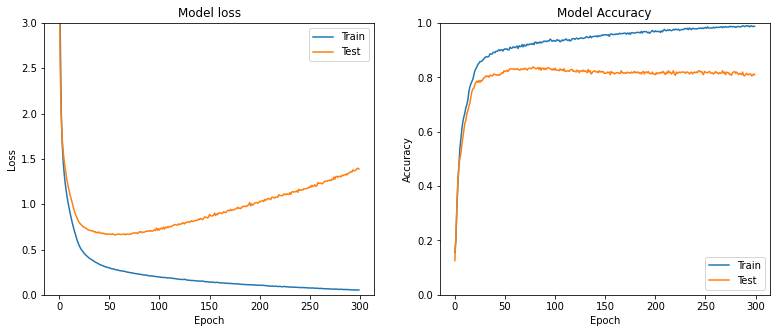

In [42]:
# RUN THIS CELL

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=1)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

Epoch 1/300
31/31 [==============================] - 1s 14ms/step - loss: 6.4747 - accuracy: 0.1221 - val_loss: 3.1274 - val_accuracy: 0.1710
Epoch 2/300
31/31 [==============================] - 0s 5ms/step - loss: 4.6683 - accuracy: 0.1536 - val_loss: 2.3728 - val_accuracy: 0.2257
Epoch 3/300
31/31 [==============================] - 0s 5ms/step - loss: 3.6330 - accuracy: 0.1608 - val_loss: 2.0259 - val_accuracy: 0.2613
Epoch 4/300
31/31 [==============================] - 0s 5ms/step - loss: 3.0596 - accuracy: 0.1886 - val_loss: 1.8584 - val_accuracy: 0.2850
Epoch 5/300
31/31 [==============================] - 0s 5ms/step - loss: 2.6181 - accuracy: 0.2085 - val_loss: 1.7723 - val_accuracy: 0.3420
Epoch 6/300
31/31 [==============================] - 0s 5ms/step - loss: 2.3350 - accuracy: 0.2638 - val_loss: 1.7094 - val_accuracy: 0.3777
Epoch 7/300
31/31 [==============================] - 0s 5ms/step - loss: 2.2134 - accuracy: 0.2483 - val_loss: 1.6615 - val_accuracy: 0.3967
Epoch 8/300


Epoch 59/300
31/31 [==============================] - 0s 5ms/step - loss: 1.0879 - accuracy: 0.5911 - val_loss: 0.7066 - val_accuracy: 0.7957
Epoch 60/300
31/31 [==============================] - 0s 5ms/step - loss: 1.0879 - accuracy: 0.5898 - val_loss: 0.7066 - val_accuracy: 0.7910
Epoch 61/300
31/31 [==============================] - 0s 5ms/step - loss: 1.0314 - accuracy: 0.6069 - val_loss: 0.6983 - val_accuracy: 0.7957
Epoch 62/300
31/31 [==============================] - 0s 5ms/step - loss: 1.0149 - accuracy: 0.6379 - val_loss: 0.6928 - val_accuracy: 0.7862
Epoch 63/300
31/31 [==============================] - 0s 5ms/step - loss: 1.0583 - accuracy: 0.5920 - val_loss: 0.6854 - val_accuracy: 0.7886
Epoch 64/300
31/31 [==============================] - 0s 5ms/step - loss: 1.0234 - accuracy: 0.6027 - val_loss: 0.6755 - val_accuracy: 0.7957
Epoch 65/300
31/31 [==============================] - 0s 5ms/step - loss: 0.9973 - accuracy: 0.6233 - val_loss: 0.6710 - val_accuracy: 0.7910
Epoch 

31/31 [==============================] - 0s 5ms/step - loss: 0.8953 - accuracy: 0.6736 - val_loss: 0.5592 - val_accuracy: 0.8171
Epoch 117/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8434 - accuracy: 0.7161 - val_loss: 0.5520 - val_accuracy: 0.8171
Epoch 118/300
31/31 [==============================] - 0s 5ms/step - loss: 0.9038 - accuracy: 0.6422 - val_loss: 0.5522 - val_accuracy: 0.8242
Epoch 119/300
31/31 [==============================] - 0s 5ms/step - loss: 0.9255 - accuracy: 0.6732 - val_loss: 0.5565 - val_accuracy: 0.8242
Epoch 120/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8535 - accuracy: 0.7027 - val_loss: 0.5534 - val_accuracy: 0.8124
Epoch 121/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7760 - accuracy: 0.7307 - val_loss: 0.5512 - val_accuracy: 0.8147
Epoch 122/300
31/31 [==============================] - 0s 5ms/step - loss: 0.9653 - accuracy: 0.6339 - val_loss: 0.5544 - val_accuracy: 0.8195
Epoch 123/300

31/31 [==============================] - 0s 5ms/step - loss: 0.7960 - accuracy: 0.7103 - val_loss: 0.5209 - val_accuracy: 0.8337
Epoch 174/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7792 - accuracy: 0.7273 - val_loss: 0.5182 - val_accuracy: 0.8361
Epoch 175/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7503 - accuracy: 0.7482 - val_loss: 0.5214 - val_accuracy: 0.8361
Epoch 176/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8298 - accuracy: 0.6995 - val_loss: 0.5150 - val_accuracy: 0.8385
Epoch 177/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8354 - accuracy: 0.7112 - val_loss: 0.5198 - val_accuracy: 0.8337
Epoch 178/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8643 - accuracy: 0.6960 - val_loss: 0.5199 - val_accuracy: 0.8290
Epoch 179/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8009 - accuracy: 0.7254 - val_loss: 0.5102 - val_accuracy: 0.8409
Epoch 180/300

31/31 [==============================] - 0s 5ms/step - loss: 0.7673 - accuracy: 0.7269 - val_loss: 0.4971 - val_accuracy: 0.8337
Epoch 231/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7573 - accuracy: 0.7188 - val_loss: 0.5012 - val_accuracy: 0.8337
Epoch 232/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7425 - accuracy: 0.7407 - val_loss: 0.5053 - val_accuracy: 0.8337
Epoch 233/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8309 - accuracy: 0.7036 - val_loss: 0.5045 - val_accuracy: 0.8337
Epoch 234/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7815 - accuracy: 0.7106 - val_loss: 0.4976 - val_accuracy: 0.8409
Epoch 235/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8048 - accuracy: 0.7067 - val_loss: 0.4985 - val_accuracy: 0.8409
Epoch 236/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8561 - accuracy: 0.6932 - val_loss: 0.4989 - val_accuracy: 0.8385
Epoch 237/300

31/31 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.7867 - val_loss: 0.4906 - val_accuracy: 0.8290
Epoch 288/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7701 - accuracy: 0.7294 - val_loss: 0.4920 - val_accuracy: 0.8290
Epoch 289/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7980 - accuracy: 0.7249 - val_loss: 0.4990 - val_accuracy: 0.8195
Epoch 290/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7075 - accuracy: 0.7452 - val_loss: 0.4977 - val_accuracy: 0.8219
Epoch 291/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7697 - accuracy: 0.7232 - val_loss: 0.4973 - val_accuracy: 0.8219
Epoch 292/300
31/31 [==============================] - 0s 5ms/step - loss: 0.8205 - accuracy: 0.7129 - val_loss: 0.4984 - val_accuracy: 0.8242
Epoch 293/300
31/31 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.7668 - val_loss: 0.4945 - val_accuracy: 0.8361
Epoch 294/300

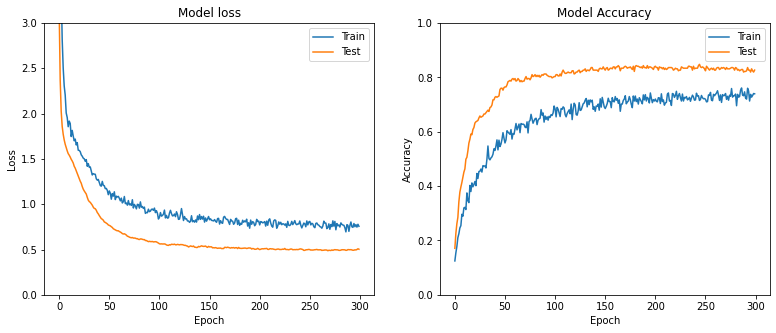

In [44]:
# DROPOUT REGULARIZATION

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=1)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

In [ ]:
# KERNEL REGULARIZATION

reg_l1 = regularizers.L1(0.01)

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10, kernel_regularizer=reg_l1))
model.add(layers.Dense(10, activation='relu',  kernel_regularizer=reg_l1))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=0)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

In [45]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Count'>

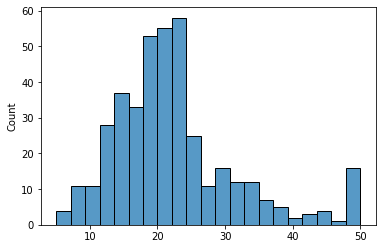

In [46]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape

sns.histplot(y_train)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
y_pred = np.mean(y_train)
print(f'The mean prediction is {y_pred:.3f}')

absolute_error = [np.abs(y - y_pred) for y in y_test]
mean_absolute_error = np.mean(absolute_error)

print(f'The benchmark mean absolute error is of {mean_absolute_error:.3f}')

The mean prediction is 22.395
The benchmark mean absolute error is of 6.533


In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_dim=13))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    return model


In [50]:
def compile_model(model, optimizer_name):
    model.compile(loss='mse', 
                  optimizer=optimizer_name,
                  metrics=['mae'])
    
    return model

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()
model = compile_model(model, 'adam')

es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.3,
          batch_size=16, epochs=1000, 
          callbacks=[es], verbose=1)

res = model.evaluate(X_test, y_test)[1]
res

Epoch 1/1000
18/18 [==============================] - 1s 21ms/step - loss: 547.1594 - mae: 21.8804 - val_loss: 631.7974 - val_mae: 23.0548
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 548.9001 - mae: 21.8979 - val_loss: 616.1296 - val_mae: 22.7161
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 496.1086 - mae: 20.8582 - val_loss: 600.4412 - val_mae: 22.3579
Epoch 4/1000
18/18 [==============================] - 0s 7ms/step - loss: 494.4872 - mae: 20.7430 - val_loss: 583.4779 - val_mae: 21.9654
Epoch 5/1000
18/18 [==============================] - 0s 6ms/step - loss: 474.2693 - mae: 20.0310 - val_loss: 565.2617 - val_mae: 21.5303
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 484.2853 - mae: 20.4826 - val_loss: 543.9216 - val_mae: 21.0194
Epoch 7/1000
18/18 [==============================] - 0s 6ms/step - loss: 450.8292 - mae: 19.4218 - val_loss: 520.1796 - val_mae: 20.4464
Epoch 8/1000
18/18 [=============

18/18 [==============================] - 0s 6ms/step - loss: 16.8551 - mae: 2.8110 - val_loss: 38.3505 - val_mae: 4.0716
Epoch 62/1000
18/18 [==============================] - 0s 6ms/step - loss: 16.9730 - mae: 2.8981 - val_loss: 37.8364 - val_mae: 4.0439
Epoch 63/1000
18/18 [==============================] - 0s 6ms/step - loss: 20.5865 - mae: 3.0294 - val_loss: 37.3872 - val_mae: 4.0277
Epoch 64/1000
18/18 [==============================] - 0s 6ms/step - loss: 17.3191 - mae: 2.8454 - val_loss: 36.8706 - val_mae: 3.9990
Epoch 65/1000
18/18 [==============================] - 0s 6ms/step - loss: 17.8571 - mae: 2.8014 - val_loss: 36.3513 - val_mae: 3.9609
Epoch 66/1000
18/18 [==============================] - 0s 6ms/step - loss: 15.4578 - mae: 2.8067 - val_loss: 35.8876 - val_mae: 3.9239
Epoch 67/1000
18/18 [==============================] - 0s 6ms/step - loss: 16.5109 - mae: 3.0269 - val_loss: 35.6065 - val_mae: 3.9132
Epoch 68/1000
18/18 [==============================] - 0s 6ms/step - 

Epoch 122/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.1673 - mae: 2.1740 - val_loss: 22.6668 - val_mae: 3.0928
Epoch 123/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.6328 - mae: 2.1731 - val_loss: 22.5217 - val_mae: 3.0866
Epoch 124/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.9933 - mae: 2.1229 - val_loss: 22.4921 - val_mae: 3.0721
Epoch 125/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.6705 - mae: 2.1297 - val_loss: 22.3656 - val_mae: 3.0743
Epoch 126/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.8605 - mae: 2.3173 - val_loss: 22.1648 - val_mae: 3.0610
Epoch 127/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0999 - mae: 2.1815 - val_loss: 22.2209 - val_mae: 3.0657
Epoch 128/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.6727 - mae: 2.2409 - val_loss: 22.0584 - val_mae: 3.0468
Epoch 129/1000
18/18 [==============================] -

Epoch 183/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2162 - mae: 1.9121 - val_loss: 19.8331 - val_mae: 2.9595
Epoch 184/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.0394 - mae: 1.9020 - val_loss: 19.7275 - val_mae: 2.9283
Epoch 185/1000
18/18 [==============================] - 0s 6ms/step - loss: 5.9697 - mae: 1.8369 - val_loss: 19.7522 - val_mae: 2.9275
Epoch 186/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.5818 - mae: 2.0296 - val_loss: 19.6358 - val_mae: 2.9405
Epoch 187/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.5963 - mae: 1.9641 - val_loss: 19.5970 - val_mae: 2.9185
Epoch 188/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.5532 - mae: 1.9716 - val_loss: 19.7557 - val_mae: 2.9367
Epoch 189/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.0374 - mae: 1.9762 - val_loss: 19.5909 - val_mae: 2.9327
Epoch 190/1000
18/18 [==============================] -

3.284663200378418

In [52]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 17.8557 - mae: 2.7924
MAE with the rmsprop optimizer: 2.7924  reached in 35 s after 335 epochs


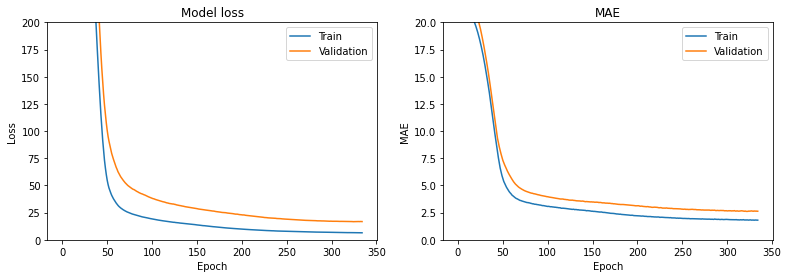

4/4 [==============================] - 0s 3ms/step - loss: 17.3737 - mae: 2.8160
MAE with the adam optimizer: 2.8160  reached in 38 s after 352 epochs


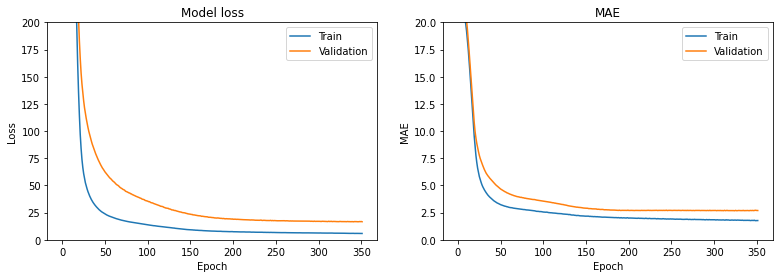

4/4 [==============================] - 0s 3ms/step - loss: 394.6777 - mae: 17.8793
MAE with the adagrad optimizer: 17.8793  reached in 51 s after 500 epochs


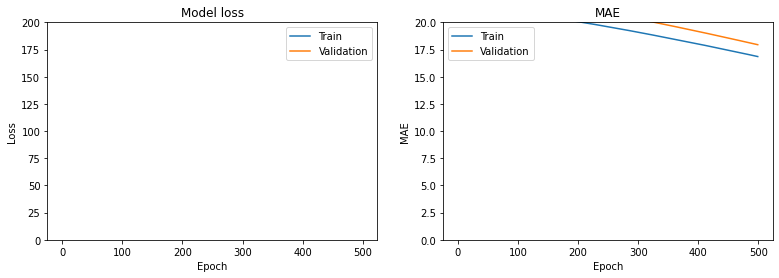

In [55]:
import time
for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

In [56]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.1)

4/4 [==============================] - 0s 3ms/step - loss: 24.1223 - mae: 3.1569
Mean absolute error with a learning rate of 0.1 optimizer: 3.1569


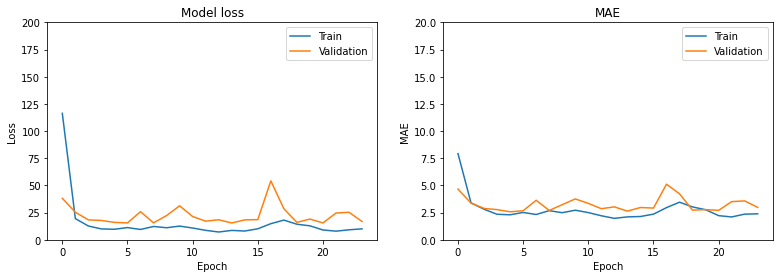

In [57]:
model = initialize_model()
model = compile_model(model, adam)

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]

print(f'Mean absolute error with a learning rate of 0.1 optimizer: {res:.4f}')
plot_loss_mae(history)

4/4 [==============================] - 0s 2ms/step - loss: 22.0687 - mae: 3.6620
MAE with a learning rate of 0.0001 optimizer: 3.6620


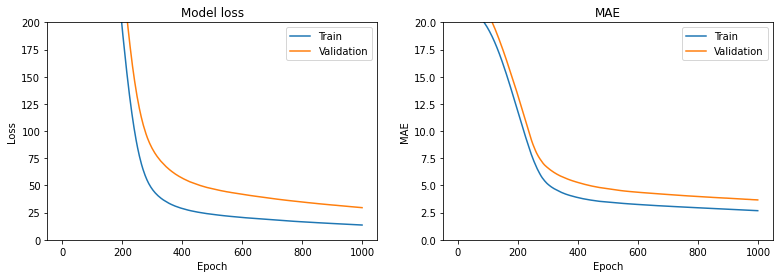

4/4 [==============================] - 0s 2ms/step - loss: 19.9609 - mae: 2.9686
MAE with a learning rate of 0.001 optimizer: 2.9686


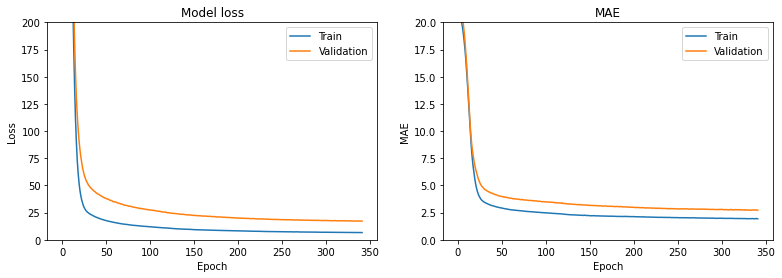

4/4 [==============================] - 0s 3ms/step - loss: 23.0646 - mae: 3.1010
MAE with a learning rate of 0.01 optimizer: 3.1010


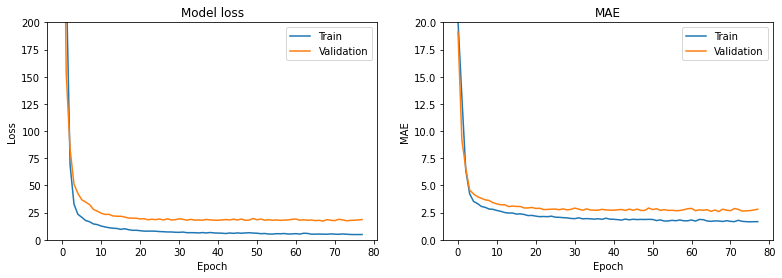

4/4 [==============================] - 0s 2ms/step - loss: 20.0210 - mae: 3.2596
MAE with a learning rate of 0.1 optimizer: 3.2596


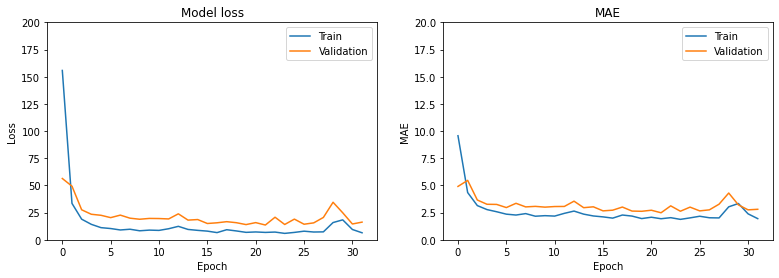

4/4 [==============================] - 0s 3ms/step - loss: 84.3653 - mae: 6.5145
MAE with a learning rate of 1 optimizer: 6.5145


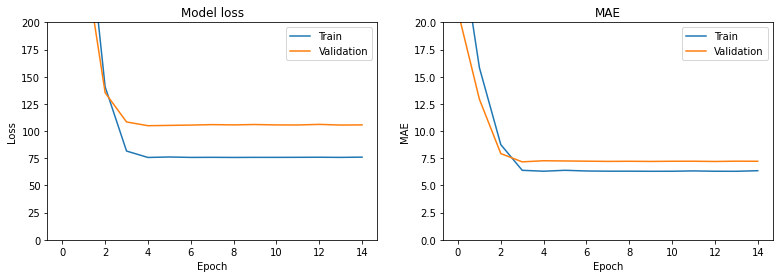

4/4 [==============================] - 0s 3ms/step - loss: 84.5393 - mae: 6.5137
MAE with a learning rate of 5 optimizer: 6.5137


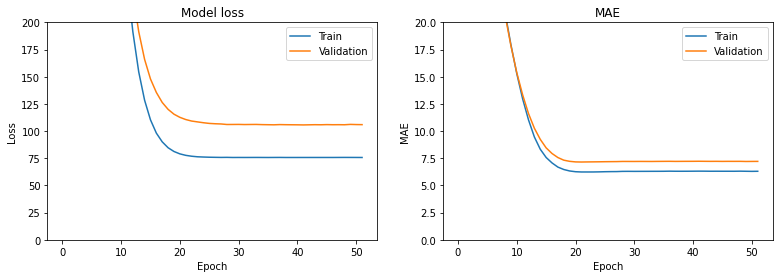

In [58]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    adam = Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model(model, adam)

    es = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=1000, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]

    print(f'MAE with a learning rate of {lr} optimizer: {res:.4f}')
    plot_loss_mae(history)


In [67]:
### First, optimizing the Mean Absolute error
model = initialize_model()
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=1)

res = model.evaluate(X_test, y_test)


Epoch 1/1000
18/18 [==============================] - 1s 22ms/step - loss: 22.5017 - mse: 594.9842 - val_loss: 23.5716 - val_mse: 666.4927
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 21.7999 - mse: 557.4507 - val_loss: 23.3555 - val_mse: 655.5862
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 21.5506 - mse: 549.2822 - val_loss: 23.1410 - val_mse: 645.3182
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 21.8151 - mse: 562.9306 - val_loss: 22.9096 - val_mse: 634.6500
Epoch 5/1000
18/18 [==============================] - 0s 7ms/step - loss: 20.7808 - mse: 515.9398 - val_loss: 22.6658 - val_mse: 624.1708
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 20.9557 - mse: 516.9580 - val_loss: 22.3871 - val_mse: 612.9269
Epoch 7/1000
18/18 [==============================] - 0s 7ms/step - loss: 21.2342 - mse: 543.2531 - val_loss: 22.0632 - val_mse: 600.7518
Epoch 8/1000
18/18 [=============

Epoch 61/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.2522 - mse: 9.8623 - val_loss: 3.6553 - val_mse: 38.2450
Epoch 62/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.5632 - mse: 15.2178 - val_loss: 3.6390 - val_mse: 37.8466
Epoch 63/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.6151 - mse: 15.1435 - val_loss: 3.6179 - val_mse: 37.6905
Epoch 64/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.5157 - mse: 13.5805 - val_loss: 3.5994 - val_mse: 37.6925
Epoch 65/1000
18/18 [==============================] - 0s 7ms/step - loss: 2.6316 - mse: 17.5581 - val_loss: 3.5905 - val_mse: 37.1098
Epoch 66/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.3244 - mse: 11.3435 - val_loss: 3.5859 - val_mse: 37.3748
Epoch 67/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.4080 - mse: 12.6978 - val_loss: 3.5514 - val_mse: 36.7458
Epoch 68/1000
18/18 [==============================] - 0

18/18 [==============================] - 0s 6ms/step - loss: 1.9019 - mse: 8.4407 - val_loss: 3.1235 - val_mse: 31.1691
Epoch 122/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.8170 - mse: 10.0273 - val_loss: 3.1123 - val_mse: 30.9388
Epoch 123/1000
18/18 [==============================] - 0s 7ms/step - loss: 1.8479 - mse: 7.5193 - val_loss: 3.1376 - val_mse: 31.3915
Epoch 124/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.1905 - mse: 11.6498 - val_loss: 3.1145 - val_mse: 30.7251
Epoch 125/1000
18/18 [==============================] - 0s 7ms/step - loss: 2.0832 - mse: 12.7135 - val_loss: 3.1346 - val_mse: 31.0291
Epoch 126/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.0328 - mse: 8.9618 - val_loss: 3.1358 - val_mse: 31.0011
Epoch 127/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.1010 - mse: 15.3056 - val_loss: 3.1155 - val_mse: 30.5736
Epoch 128/1000
18/18 [==============================] - 0s 7ms/ste

In [68]:
print(f"MAE_train : {min(history.history['loss']):.4f} - MSE_train : {min(history.history['mse']):.4f}")
print(f"MAE_val : {min(history.history['val_loss']):.4f} - MSE_val : {min(history.history['val_mse']):.4f}")
print(f"MAE_test : {res[0]:.4f} - MSE_val : {res[1]:.4f}")

MAE_train : 1.8099 - MSE_train : 9.1079
MAE_val : 3.0504 - MSE_val : 29.7361
MAE_test : 2.6222 - MSE_val : 14.7124


In [69]:
### Second, optimizing the Mean Squared Error
model = initialize_model()
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]


4/4 [==============================] - 0s 2ms/step - loss: 22.9237 - mae: 2.9634


In [70]:
res = model.evaluate(X_test, y_test, verbose=0)
print(f"MAE_train : {min(history.history['mae']):.4f} - MSE_train : {min(history.history['loss']):.4f}")
print(f"MAE_val : {min(history.history['val_mae']):.4f} - MSE_val : {min(history.history['val_loss']):.4f}")
print(f"MAE_test : {res[1]:.4f} - MSE_val : {res[0]:.4f}")

MAE_train : 1.7806 - MSE_train : 6.2059
MAE_val : 2.8169 - MSE_val : 18.3624
MAE_test : 2.9634 - MSE_val : 22.9237


In [74]:
mae_test = model.evaluate(X_test, y_test)[1]
mae_test

4/4 [==============================] - 0s 3ms/step - loss: 20.4661 - mae: 2.9042


2.904205560684204

In [ ]:
# models.save_model(model, 'my_model')

In [ ]:
# loaded_model = models.load_model('my_model')
# loaded_model.evaluate(X_test, y_test, verbose=0)

In [72]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

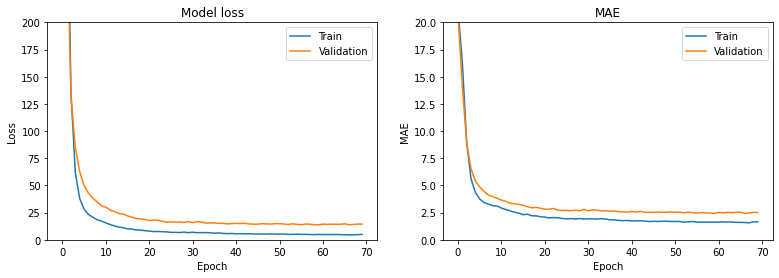

MAE_train : 1.5563 - MSE_train : 4.4751
MAE_val : 2.4167 - MSE_val : 13.7049


In [73]:
# # Instanciate model
# model = models.Sequential()
# model.add(layers.Dense(10, activation='relu', input_dim=13))
# model.add(layers.Dense(7, activation='relu'))
# model.add(layers.Dense(1, activation='linear'))


# # Compile
# initial_learning_rate = 0.01 # start with default ADAM value

# lr_schedule = ExponentialDecay(
#     initial_learning_rate, decay_steps=2000, decay_rate=0.5)

# adam = Adam(learning_rate=lr_schedule)

# model = compile_model(model, adam)

# # Fit Model
# es = EarlyStopping(patience=10)

# history = model.fit(X_train, y_train, validation_split=0.3,
#                   batch_size=16, epochs=1000,
#                   callbacks=[es], verbose=0)

# plot_loss_mae(history)
# print(f"MAE_train : {min(history.history['mae']):.4f} - MSE_train : {min(history.history['loss']):.4f}")
# print(f"MAE_val : {min(history.history['val_mae']):.4f} - MSE_val : {min(history.history['val_loss']):.4f}")

4/4 [==============================] - 0s 3ms/step - loss: 22.4231 - mae: 3.1150
Mean absolute error : 3.1150


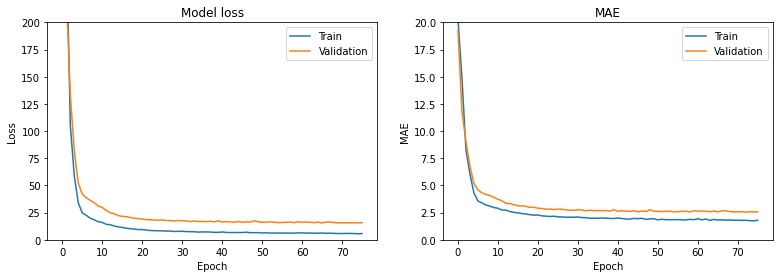

In [75]:
initial_learning_rate = 0.01 # start with 10 times the default ADAM value

lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=2000, decay_rate=0.5,
    # Every 2000 iterations, multiply the learning rate by 0.5
    # PS: we have appox 350/16 ~ 20 iterations per epoch
)

adam = Adam(learning_rate=lr_schedule)

model = initialize_model()
model = compile_model(model, adam)

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test)[1]

print(f'Mean absolute error : {res:.4f}')
plot_loss_mae(history)